# IMPORTING NECESSARY LIBRARIES

In [2]:
import os
import glob
import numpy as np
import tensorflow 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.applications import ResNet50,VGG16 
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
%matplotlib inline

# READING THE DIRECTORY CONTAINING THE THE TRAINING IMAGES

In [3]:
glob.glob('Intel_Image_classification/seg_train/seg_train/*')

['Intel_Image_classification/seg_train/seg_train/forest',
 'Intel_Image_classification/seg_train/seg_train/buildings',
 'Intel_Image_classification/seg_train/seg_train/glacier',
 'Intel_Image_classification/seg_train/seg_train/street',
 'Intel_Image_classification/seg_train/seg_train/mountain',
 'Intel_Image_classification/seg_train/seg_train/sea']

# MAKING A FUNCTION TO CONVERT IMAGES TO A FORM SUITABLE FOR OUR CONVOLUTIONAL NEURAL NETWORKS TO WORK ON I.E. ARRAYS

In [4]:
def prepare_dataset(path,label):
    x_train=[]
    y_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
            y_train.append(label)
    return np.array(x_train),np.array(y_train)

# READING THE LABELS OF THE IMAGES IN A LIST CALLED LABELS

In [5]:
paths=glob.glob('Intel_Image_classification/seg_train/seg_train/*')
l=len('Intel_Image_classification/seg_train/seg_train/')
labels=[]
for path in paths:
    labels.append(path[l:])
    print(labels)

['forest']
['forest', 'buildings']
['forest', 'buildings', 'glacier']
['forest', 'buildings', 'glacier', 'street']
['forest', 'buildings', 'glacier', 'street', 'mountain']
['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']


# LOOKING AT SOME IMAGES IN THE TRAINING SET BELONGING TO THE DIFFERENT CLASSES

Text(0.5, 0, 'Street')

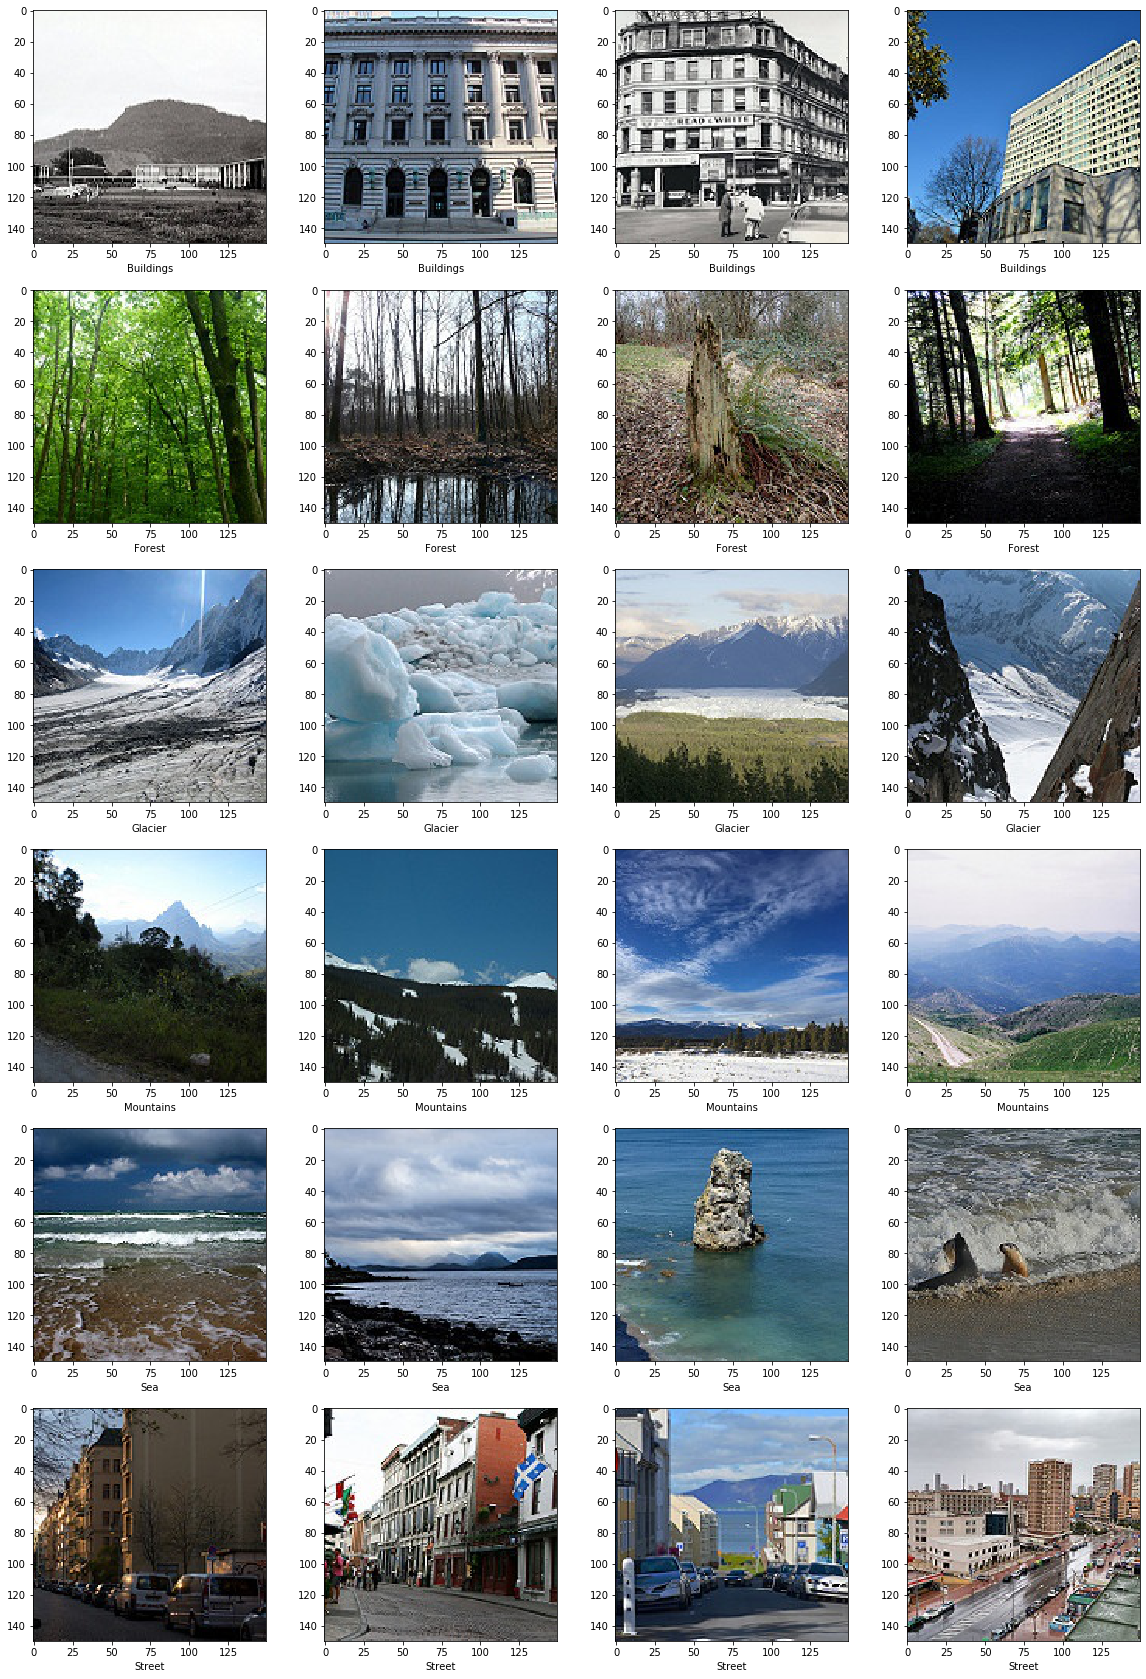

In [68]:
fig=plt.figure(figsize=(20,30))
ax = fig.add_subplot(6, 4, 1)
image1 = load_img("Intel_Image_classification/seg_train/seg_train/buildings/0.jpg")
imgplot=plt.imshow(image1)
plt.xlabel('Buildings')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/buildings/53.jpg")
ax = fig.add_subplot(6, 4, 2)
imgplot=plt.imshow(image2)
plt.xlabel('Buildings')
image3 = load_img("Intel_Image_classification/seg_train/seg_train/buildings/66.jpg")
ax = fig.add_subplot(6, 4, 3)
imgplot=plt.imshow(image3)
plt.xlabel('Buildings')
image4 = load_img("Intel_Image_classification/seg_train/seg_train/buildings/112.jpg")
ax = fig.add_subplot(6, 4, 4)
imgplot=plt.imshow(image4)
plt.xlabel('Buildings')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/forest/8.jpg")
ax = fig.add_subplot(6, 4, 5)
imgplot=plt.imshow(image2)
plt.xlabel('Forest')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/forest/23.jpg")
ax = fig.add_subplot(6, 4, 6)
imgplot=plt.imshow(image2)
plt.xlabel('Forest')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/forest/41.jpg")
ax = fig.add_subplot(6, 4, 7)
imgplot=plt.imshow(image2)
plt.xlabel('Forest')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/forest/46.jpg")
ax = fig.add_subplot(6, 4, 8)
imgplot=plt.imshow(image2)
plt.xlabel('Forest')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/glacier/10.jpg")
ax = fig.add_subplot(6, 4, 9)
imgplot=plt.imshow(image2)
plt.xlabel('Glacier')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/glacier/13.jpg")
ax = fig.add_subplot(6, 4, 10)
imgplot=plt.imshow(image2)
plt.xlabel('Glacier')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/glacier/15.jpg")
ax = fig.add_subplot(6, 4, 11)
imgplot=plt.imshow(image2)
plt.xlabel('Glacier')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/glacier/18.jpg")
ax = fig.add_subplot(6, 4, 12)
imgplot=plt.imshow(image2)
plt.xlabel('Glacier')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/mountain/16.jpg")
ax = fig.add_subplot(6, 4, 13)
imgplot=plt.imshow(image2)
plt.xlabel('Mountains')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/mountain/17.jpg")
ax = fig.add_subplot(6, 4, 14)
imgplot=plt.imshow(image2)
plt.xlabel('Mountains')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/mountain/32.jpg")
ax = fig.add_subplot(6, 4, 15)
imgplot=plt.imshow(image2)
plt.xlabel('Mountains')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/mountain/34.jpg")
ax = fig.add_subplot(6, 4, 16)
imgplot=plt.imshow(image2)
plt.xlabel('Mountains')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/sea/136.jpg")
ax = fig.add_subplot(6, 4, 17)
imgplot=plt.imshow(image2)
plt.xlabel('Sea')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/sea/90.jpg")
ax = fig.add_subplot(6, 4, 18)
imgplot=plt.imshow(image2)
plt.xlabel('Sea')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/sea/20.jpg")
ax = fig.add_subplot(6, 4, 19)
imgplot=plt.imshow(image2)
plt.xlabel('Sea')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/sea/21.jpg")
ax = fig.add_subplot(6, 4, 20)
imgplot=plt.imshow(image2)
plt.xlabel('Sea')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/street/2.jpg")
ax = fig.add_subplot(6, 4, 21)
imgplot=plt.imshow(image2)
plt.xlabel('Street')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/street/9.jpg")
ax = fig.add_subplot(6, 4, 22)
imgplot=plt.imshow(image2)
plt.xlabel('Street')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/street/12.jpg")
ax = fig.add_subplot(6, 4, 23)
imgplot=plt.imshow(image2)
plt.xlabel('Street')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/street/19.jpg")
ax = fig.add_subplot(6, 4, 24)
imgplot=plt.imshow(image2)
plt.xlabel('Street')

# APPLYING OUR FUNCTION TO THE DIFFERENT CLASSES OF THE IMAGES IN THE TRAINING SET 

In [5]:
trainX_building, trainY_building  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/buildings/",0)
trainX_forest,trainY_forest  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/forest/",1)
trainX_glacier,trainY_glacier  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/glacier/",2)
trainX_mount,trainY_mount  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/mountain/",3)
trainX_sea,trainY_sea  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/sea/",4)
trainX_street,trainY_street  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/street/",5)

print('train building shape ', trainX_building.shape, trainY_building.shape) 
print('train forest', trainX_forest.shape ,trainY_forest.shape)
print('train glacier', trainX_glacier.shape,trainY_glacier.shape)
print('train mountain', trainX_mount.shape, trainY_mount.shape)
print('train sea',     trainX_sea.shape, trainY_sea.shape)
print('train street', trainX_street.shape ,trainY_street.shape)

train building shape  (2191, 150, 150, 3) (2191,)
train forest (2271, 150, 150, 3) (2271,)
train glacier (2404, 150, 150, 3) (2404,)
train mountain (2512, 150, 150, 3) (2512,)
train sea (2274, 150, 150, 3) (2274,)
train street (2382, 150, 150, 3) (2382,)


# CONCATENATING THE IMAGE ARRAYS OF THE DIFFERENT CLASSES IN THE TRAINING SET TO TO VARIABLES X_TRAIN AND Y_TRAIN FOR DEFINING THE TRAINING SET 

In [6]:
x_train=np.concatenate((trainX_building,trainX_forest,trainX_glacier,trainX_mount,trainX_sea,trainX_street),axis=0)
y_train=np.concatenate((trainY_building,trainY_forest,trainY_glacier,trainY_mount,trainY_sea,trainY_street),axis=0)

In [7]:
print(x_train.shape)
print(y_train.shape)

(14034, 150, 150, 3)
(14034,)


# WE SEE THAT THERE ARE 14,034 IMAGES IN THE TRAINING SET

# DOING THE SAME STEPS FOR THE TESTING SET

In [8]:
testX_building, testY_building  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/buildings/",0)
testX_forest,testY_forest  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/forest/",1)
testX_glacier,testY_glacier  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/glacier/",2)
testX_mount,testY_mount  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/mountain/",3)
testX_sea,testY_sea  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/sea/",4)
testX_street,testY_street  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/street/",5)

x_test=np.concatenate((testX_building,testX_forest,testX_glacier,testX_mount,testX_sea,testX_street),axis=0)
y_test=np.concatenate((testY_building,testY_forest,testY_glacier,testY_mount,testY_sea,testY_street),axis=0)

# DEFINING THE IMAGE DATA GENERATORS FOR THE TRAINING AND TESTING SET, USED TO FLOW THE IMAGE DATA FROM THE DIRECTORIES 

In [13]:
img_aug_tr = ImageDataGenerator(rescale=1./255)
train_gen = img_aug_tr.flow_from_directory('Intel_Image_classification/seg_train/seg_train/',
                                       target_size=(150,150),
                                       class_mode='categorical',
                                       batch_size = 16)

Found 14034 images belonging to 6 classes.


In [14]:
img_aug_tr = ImageDataGenerator(rescale=1./255)
test_gen = img_aug_tr.flow_from_directory('Intel_Image_classification/seg_test/seg_test/',
                                       target_size=(150,150),
                                       class_mode='categorical',
                                       batch_size = 16)

Found 3000 images belonging to 6 classes.


# CREATING OUR OWN CONVOLUTIONAL NEURAL NETWORK MODEL FOR 

# IMAGE CLASSIFICATION, WITH DROPOUT AND BATCH NORMALIZATION  

# TO REDUCE OVERFITTING AND COVARIATE SHIFT, RESPECTIVELY

In [76]:

model = Sequential()

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(512, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.33))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(6, activation = 'softmax')) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
batch_normalization_28 (Batc (None, 148, 148, 64)      256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 146, 146, 64)      36928     
_________________________________________________________________
batch_normalization_29 (Batc (None, 146, 146, 64)      256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 71, 71, 128)      

# COMPILING THE MODEL WITH APPROPRIATE PARAMETERS

In [77]:
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# TRAINING THE MODEL FOR 10 EPOCHS

In [78]:
history = model.fit_generator(
       train_gen,
       epochs=10,
       validation_data=test_gen)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
878/878 [==============================] - 13981s 16s/step - loss: 1.0923 - accuracy: 0.5772 - val_loss: 1.1559 - val_accuracy: 0.5673
Epoch 2/10
878/878 [==============================] - 3686s 4s/step - loss: 0.7904 - accuracy: 0.7121 - val_loss: 0.8715 - val_accuracy: 0.6703
Epoch 3/10
878/878 [==============================] - 3249s 4s/step - loss: 0.6951 - accuracy: 0.7470 - val_loss: 0.8986 - val_accuracy: 0.6407
Epoch 4/10
878/878 [==============================] - 3282s 4s/step - loss: 0.6283 - accuracy: 0.7738 - val_loss: 0.4900 - val_accuracy: 0.8160
Epoch 5/10
878/878 [==============================] - 3559s 4s/step - loss: 0.5832 - accuracy: 0.7918 - val_loss: 0.8133 - val_accuracy: 0.6990
Epoch 6/10
878/878 [==============================] - 3426s 4s/step - loss: 0.5473 - accuracy: 0.8080 - val_loss: 0.6420 - val_accuracy: 0.7663
Epoch 7/10
878/878 [==============================] - 6304

#  WE SEE THAT THIS PERFORMS MODERATELY WELL ON OUR IMAGE DATA, ITS VALIDATION ACCURACY IS 83.53 %

# RESNET-50 :

  resnet_50_image.png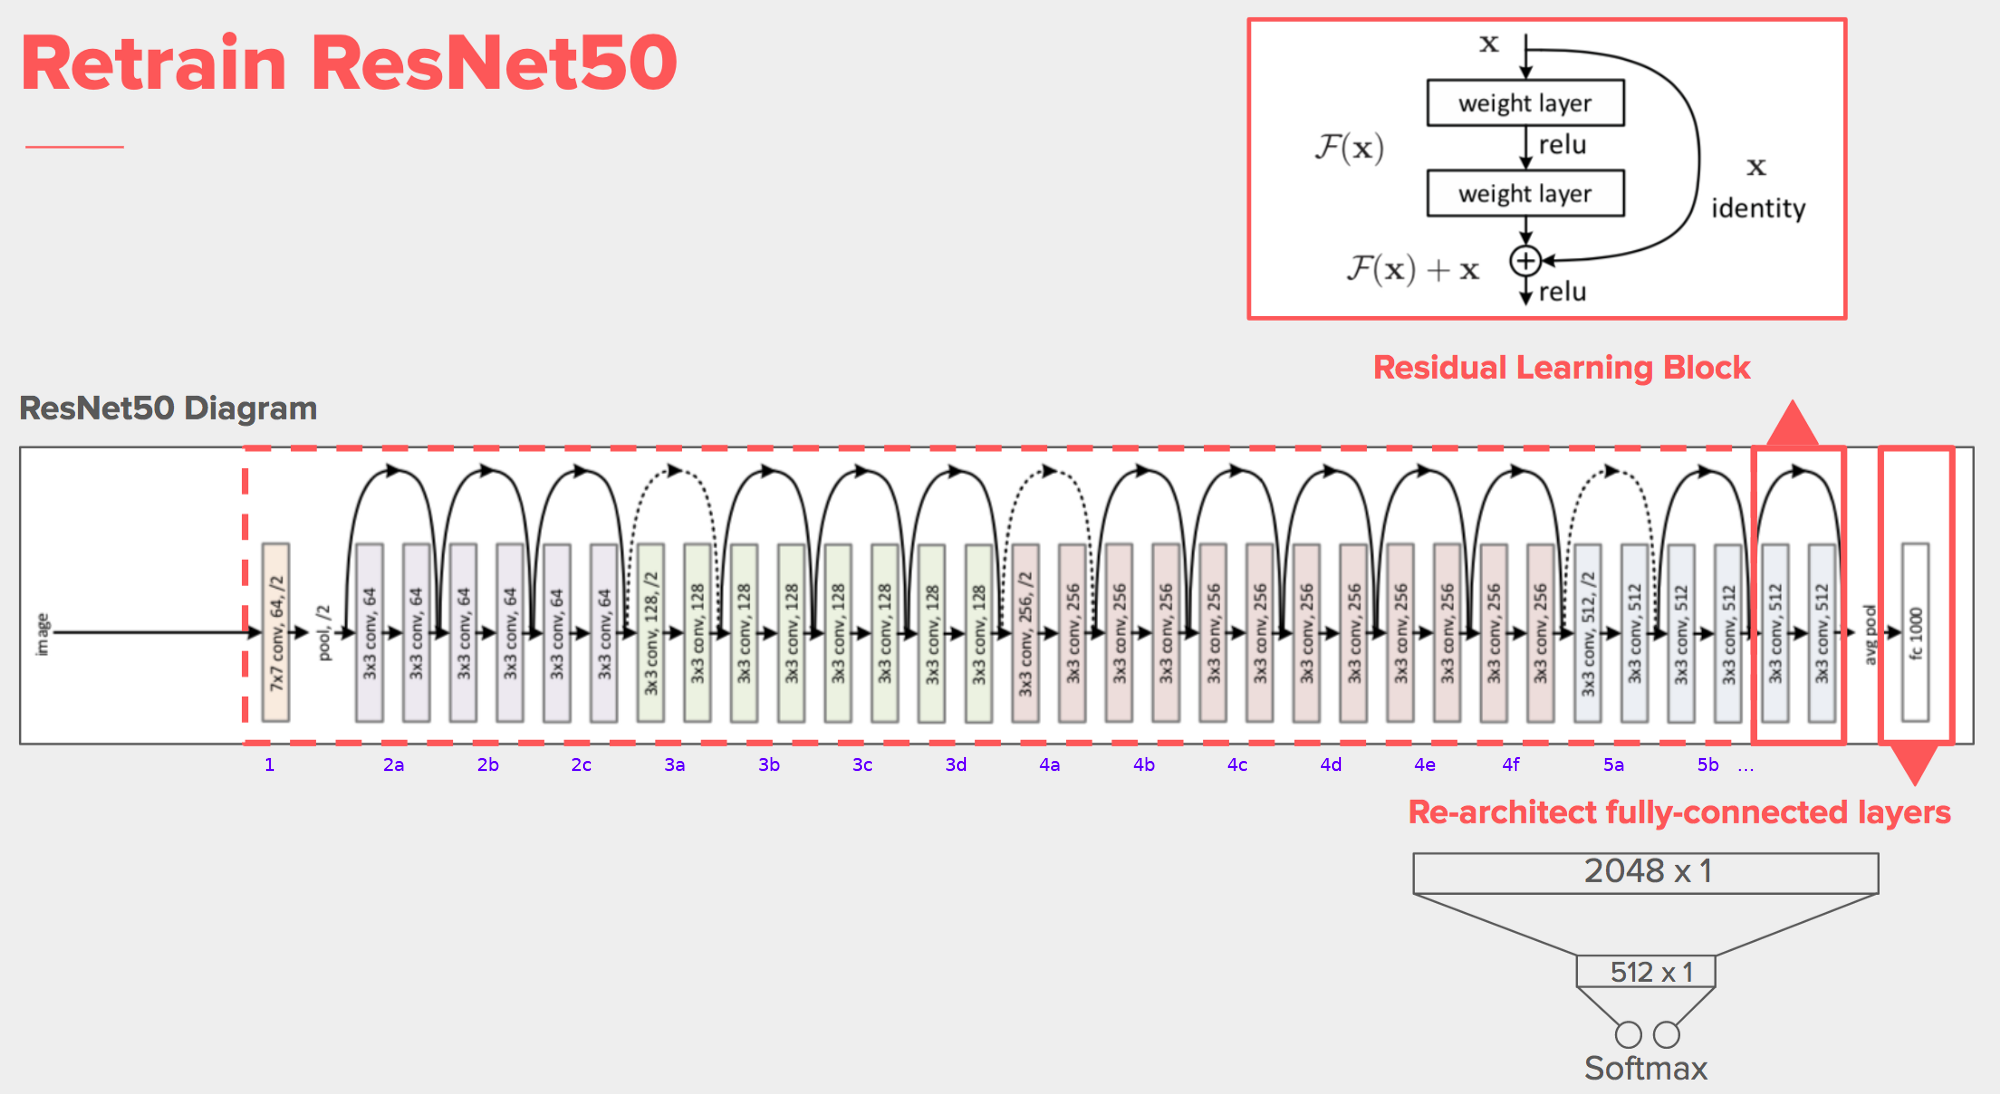

## CREATING A RESNET50 MODEL, WITH PRE-TRAINED WEIGHTS BY IMAGENET AND VIEWING ITS SUMMARY

In [92]:
pretrained_model=ResNet50( input_shape=(150,150,3),
                                  include_top=False,
                                  weights='imagenet'
                                   )
pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## SETTING THE LAYERS.TRAINABLE TO FALSE SO THAT IT DOES NOT FORGET THE INFORMATION IT HAS ACQUIRED WHEN IT WAS PRE-TRAINED ON THOUSANDS OF IMAGES,  WHEN WE RETRAIN THE MODEL FOR OUR IMAGE DATA,
## THEN PASSING THE EXTRACTED FEATURES OF THE RESNET50 THROUGH TWO FULLY CONNECTED LAYERS, (WITH DROPOUT TO CONTROL OVERFITING) AND FINALLY APPLYING SOFTMAX FOR GETTING THE PREDICTION. TRAINING THE MODEL FOR 10 EPOCHS WITH THE BEST PARAMETERS

In [83]:
for layer in pretrained_model.layers:
     layer.trainable = False


last_layer = pretrained_model.get_layer('conv5_block3_out')
print('last layer of resnet50 : output shape: ', last_layer.output_shape)
last_output = last_layer.output


x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x) 
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(6, activation='softmax')(x)


model_resnet = Model(pretrained_model.input, x) 


model_resnet.compile(optimizer = Adam(1e-5), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])


model_resnet.fit_generator(train_gen,epochs=10,validation_data=test_gen)

last layer of resnet50 : output shape:  (None, 5, 5, 2048)
Epoch 1/10
878/878 [==============================] - 1052s 1s/step - loss: 1.4643 - acc: 0.4015 - val_loss: 1.1662 - val_acc: 0.5437
Epoch 2/10
878/878 [==============================] - 1015s 1s/step - loss: 1.1385 - acc: 0.5516 - val_loss: 1.0456 - val_acc: 0.5610
Epoch 3/10
878/878 [==============================] - 1022s 1s/step - loss: 1.0252 - acc: 0.5938 - val_loss: 0.9708 - val_acc: 0.6270
Epoch 4/10
878/878 [==============================] - 1867s 2s/step - loss: 0.9554 - acc: 0.6270 - val_loss: 0.9078 - val_acc: 0.6610
Epoch 5/10
878/878 [==============================] - 5715s 7s/step - loss: 0.9177 - acc: 0.6367 - val_loss: 0.8752 - val_acc: 0.6670
Epoch 6/10
878/878 [==============================] - 2037s 2s/step - loss: 0.8736 - acc: 0.6602 - val_loss: 0.8483 - val_acc: 0.6803
Epoch 7/10
878/878 [==============================] - 1034s 1s/step - loss: 0.8452 - acc: 0.6704 - val_loss: 0.8523 - val_acc: 0.6573
Epo

## WE SEE THAT RESNET50 DOES NOT PERFORM WELL ON OUR IMAGE DATA, ITS VALIDATION ACCURACY IS 69.4%

# VGG-16:

vgg16-1-e1542731207177.png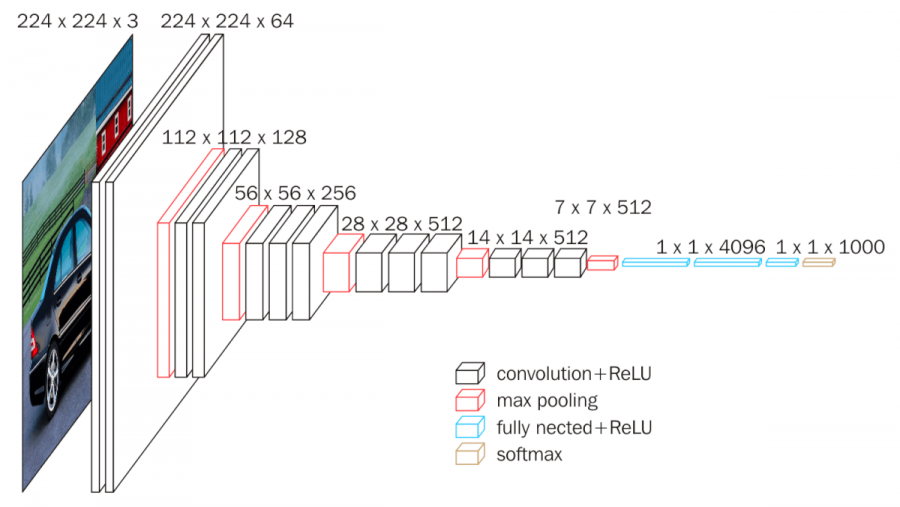  

## CREATING A VGG-16 MODEL, WITH PRE-TRAINED WEIGHTS BY IMAGENET AND VIEWING ITS SUMMARY

In [91]:
pretrained_model=VGG16(input_shape = (150, 150, 3), 
                        include_top = False, 
                        weights = 'imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## SETTING THE LAYERS.TRAINABLE TO FALSE SO THAT IT DOES NOT FORGET THE INFORMATION IT HAS ACQUIRED WHEN IT WAS PRE-TRAINED ON THOUSANDS OF IMAGES,  WHEN WE RETRAIN THE MODEL FOR OUR IMAGE DATA,
## THEN PASSING THE EXTRACTED FEATURES OF THE VGG-16 THROUGH TWO FULLY CONNECTED LAYERS, (WITH DROPOUT TO CONTROL OVERFITING) AND FINALLY APPLYING SOFTMAX FOR GETTING THE PREDICTION. TRAINING THE MODEL FOR 10 EPOCHS WITH THE BEST PARAMETERS

In [84]:
for layer in pretrained_model.layers:
     layer.trainable = False


last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output= last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)   
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x) 
x = layers.Dense(6, activation='softmax')(x)           

model_vgg = Model(pretrained_model.input, x) 


model_vgg.compile(optimizer = Adam(1e-5), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model_vgg.fit(train_gen,epochs=10,validation_data=test_gen)

last layer of vgg : output shape:  (None, 4, 4, 512)
Epoch 1/10
878/878 [==============================] - 2024s 2s/step - loss: 0.7619 - acc: 0.7267 - val_loss: 0.4317 - val_acc: 0.8477
Epoch 2/10
878/878 [==============================] - 4078s 5s/step - loss: 0.4331 - acc: 0.8446 - val_loss: 0.3793 - val_acc: 0.8617
Epoch 3/10
878/878 [==============================] - 3560s 4s/step - loss: 0.3734 - acc: 0.8668 - val_loss: 0.3433 - val_acc: 0.8743
Epoch 4/10
878/878 [==============================] - 3096s 4s/step - loss: 0.3341 - acc: 0.8825 - val_loss: 0.3314 - val_acc: 0.8760
Epoch 5/10
878/878 [==============================] - 1980s 2s/step - loss: 0.3042 - acc: 0.8908 - val_loss: 0.3282 - val_acc: 0.8787
Epoch 6/10
878/878 [==============================] - 1961s 2s/step - loss: 0.2823 - acc: 0.8992 - val_loss: 0.3171 - val_acc: 0.8803
Epoch 7/10
878/878 [==============================] - 2711s 3s/step - loss: 0.2587 - acc: 0.9084 - val_loss: 0.3081 - val_acc: 0.8843
Epoch 8/1

## WE SEE THAT VGG-16 DOES PERFORMS WELL ON OUR IMAGE DATA, ITS VALIDATION ACCURACY IS 88.73%

# INCEPTION-V3

  Inception_V3_image.jpeg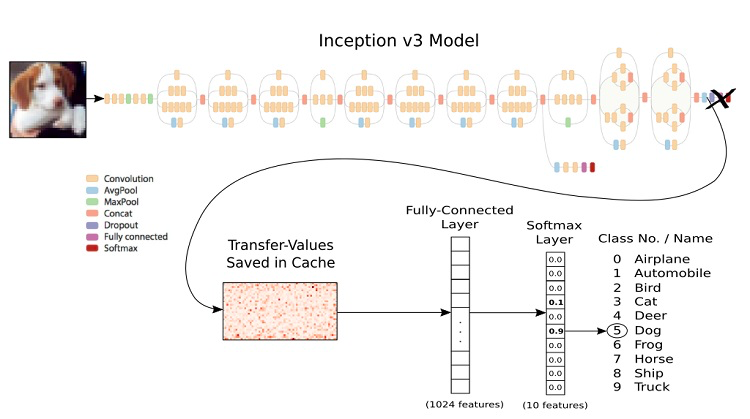

## CREATING AN INCEPTION-V3 MODEL, WITH PRE-TRAINED WEIGHTS BY IMAGENET AND VIEWING ITS SUMMARY

In [81]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = "imagenet")
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization_12[0][0]     
_______________________________________________________________________________________

## SETTING THE LAYERS.TRAINABLE TO FALSE SO THAT IT DOES NOT FORGET THE INFORMATION IT HAS ACQUIRED WHEN IT WAS PRE-TRAINED ON THOUSANDS OF IMAGES,  WHEN WE RETRAIN THE MODEL FOR OUR IMAGE DATA,
## THEN PASSING THE EXTRACTED FEATURES OF THE INCEPTION-V3 THROUGH TWO FULLY CONNECTED LAYERS, (WITH DROPOUT TO CONTROL OVERFITING) AND FINALLY APPLYING SOFTMAX FOR GETTING THE PREDICTION. TRAINING THE MODEL FOR 10 EPOCHS WITH THE BEST PARAMETERS

In [93]:
for layer in pre_trained_model.layers:
     layer.trainable = False
        

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x) 
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)  
x = layers.Dense(6, activation='softmax')(x)           

model_inception = Model(pre_trained_model.input, x) 

model_inception.compile(optimizer = Adam(1e-5), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model_inception.fit_generator(train_gen,epochs=10,validation_data=test_gen)


last layer output shape:  (None, 7, 7, 768)
Epoch 1/10
878/878 [==============================] - 513s 584ms/step - loss: 0.4338 - acc: 0.8538 - val_loss: 0.2618 - val_acc: 0.9083
Epoch 2/10
878/878 [==============================] - 504s 573ms/step - loss: 0.2185 - acc: 0.9220 - val_loss: 0.2458 - val_acc: 0.9113
Epoch 3/10
878/878 [==============================] - 532s 606ms/step - loss: 0.1548 - acc: 0.9476 - val_loss: 0.2333 - val_acc: 0.9160
Epoch 4/10
878/878 [==============================] - 539s 614ms/step - loss: 0.1135 - acc: 0.9626 - val_loss: 0.2603 - val_acc: 0.9157
Epoch 5/10
878/878 [==============================] - 518s 590ms/step - loss: 0.0780 - acc: 0.9775 - val_loss: 0.2667 - val_acc: 0.9177
Epoch 6/10
878/878 [==============================] - 519s 591ms/step - loss: 0.0538 - acc: 0.9857 - val_loss: 0.2482 - val_acc: 0.9160
Epoch 7/10
878/878 [==============================] - 521s 593ms/step - loss: 0.0384 - acc: 0.9900 - val_loss: 0.2777 - val_acc: 0.9157
Epoc

## WE SEE THAT INCEPTION-V3 PERFORMS WELL ON OUR IMAGE DATA, ITS VALIDATION ACCURACY IS 91.3%

# XCEPTION :

  Xception.png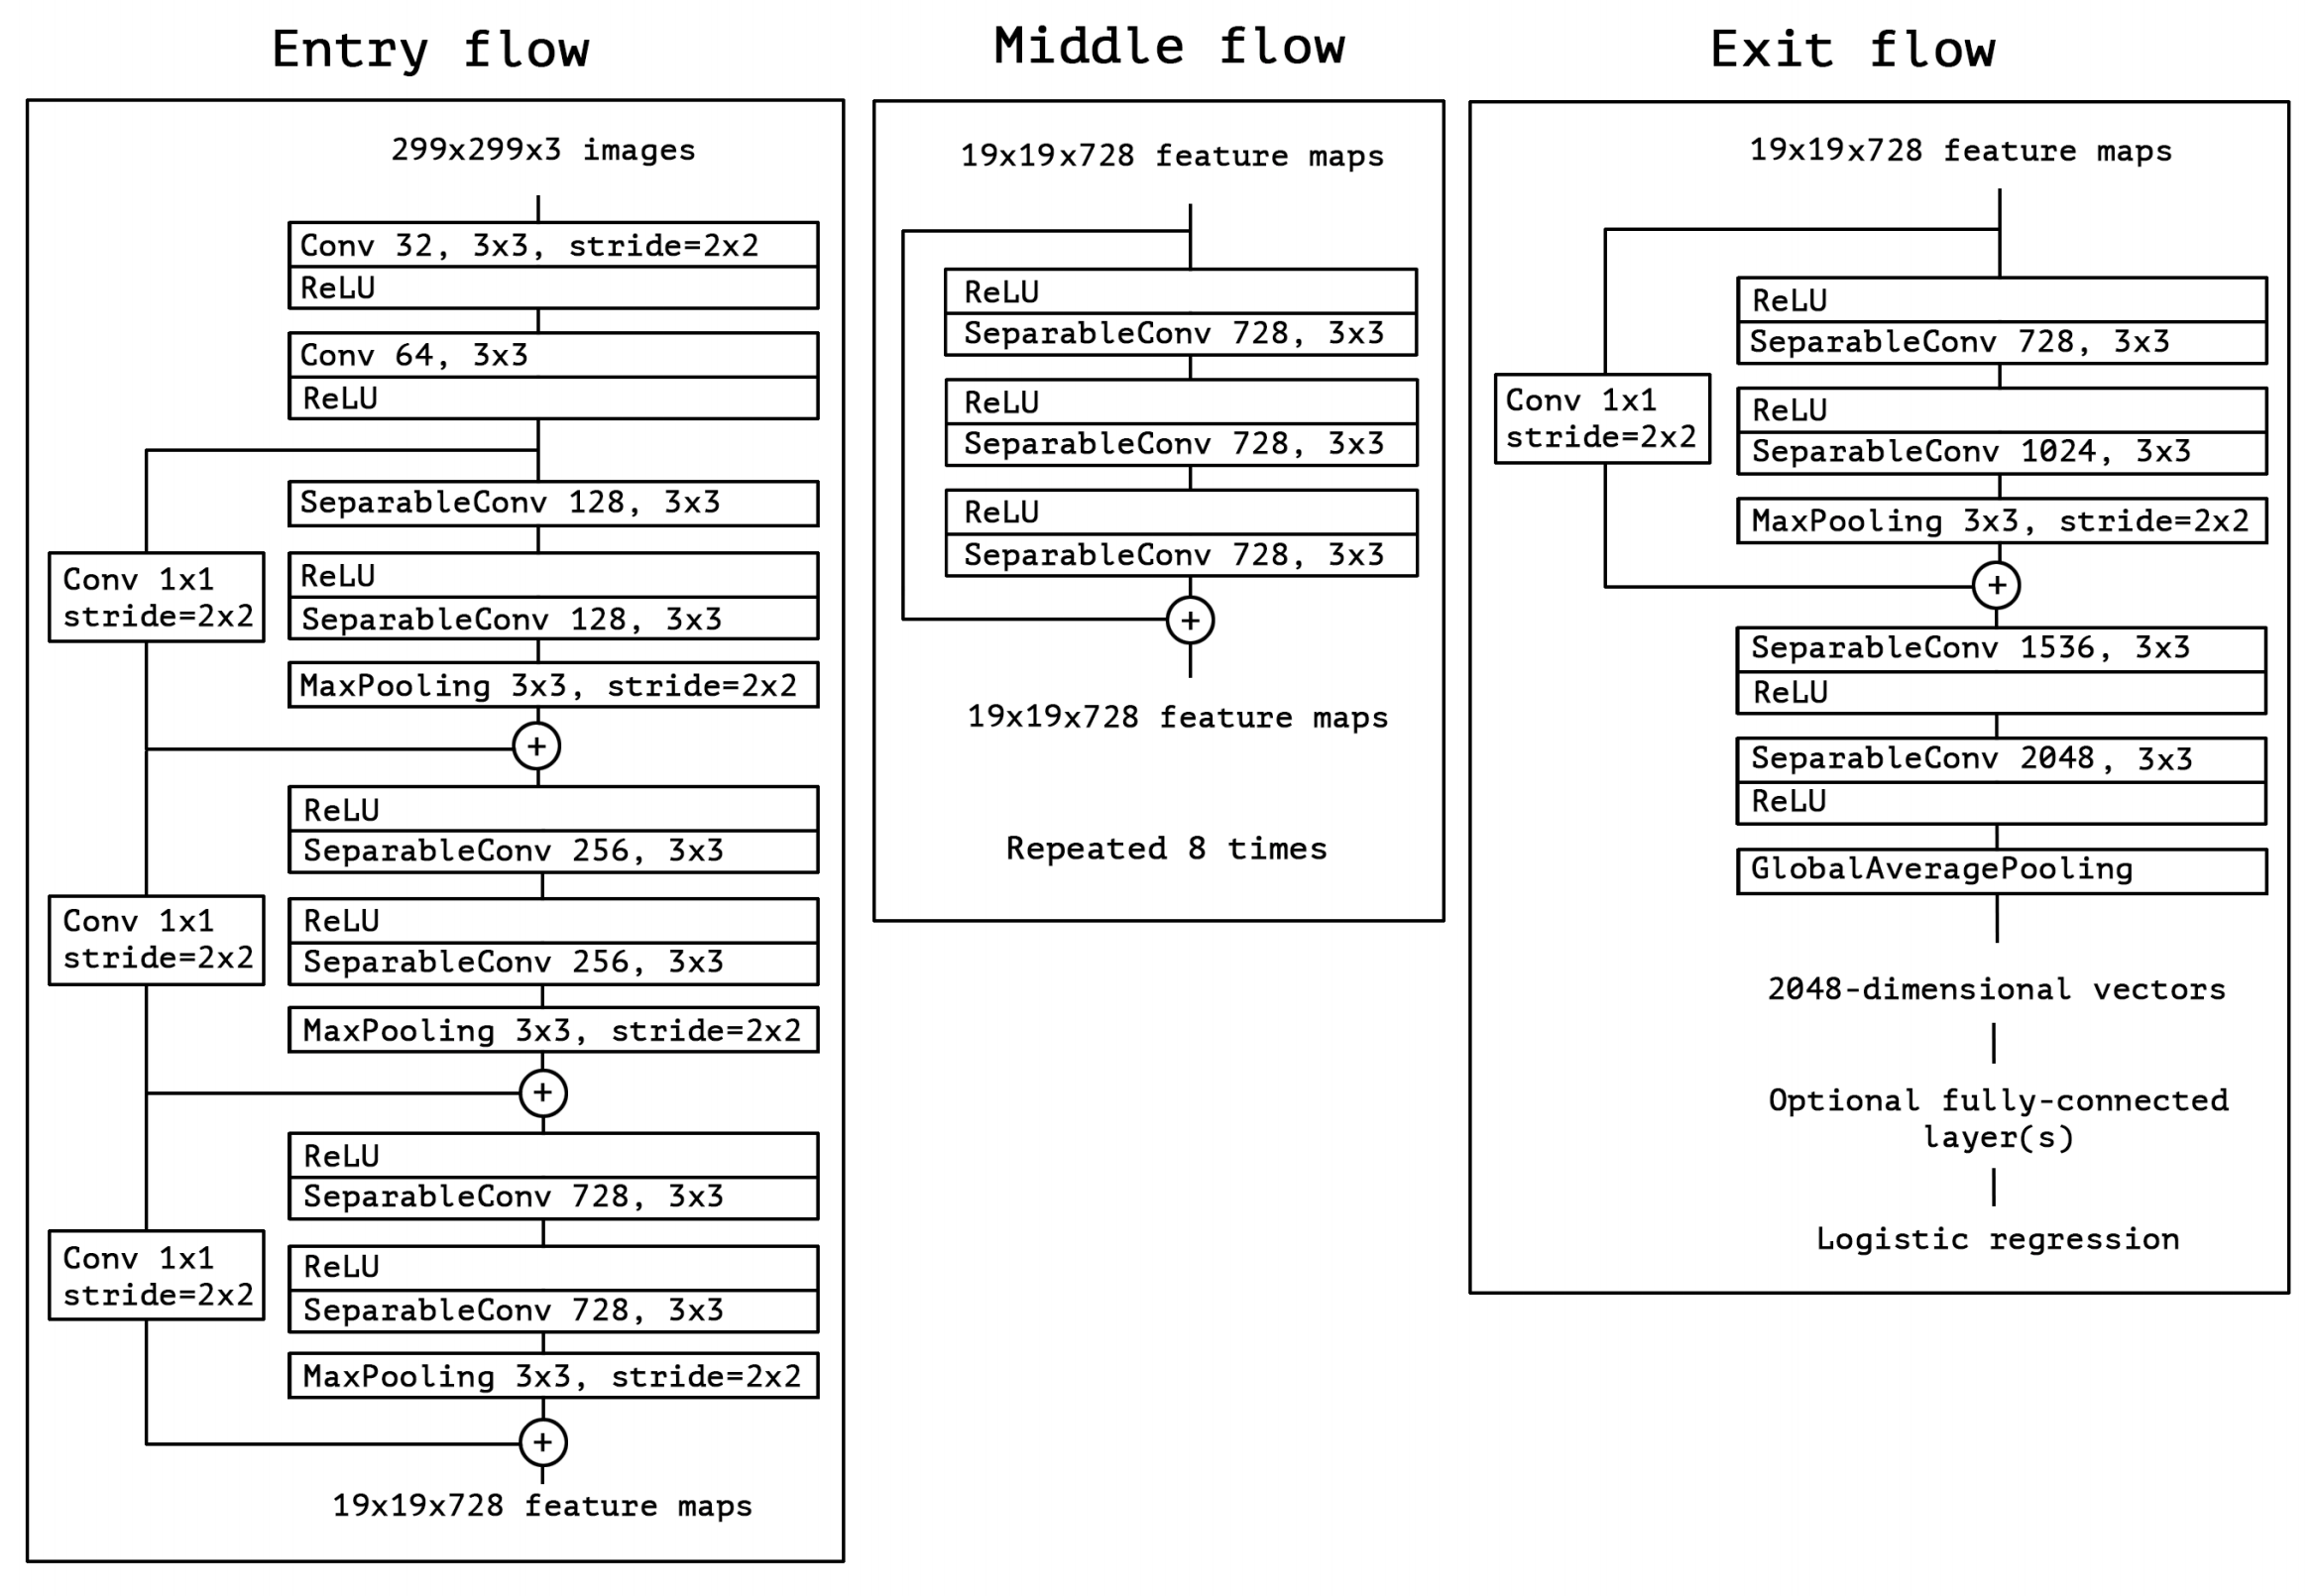

## CREATING AN XCEPTION MODEL, WITH PRE-TRAINED WEIGHTS BY IMAGENET AND VIEWING ITS SUMMARY

In [82]:
pre_trained_model = Xception(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = "imagenet")
pre_trained_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

## SETTING THE LAYERS.TRAINABLE TO FALSE SO THAT IT DOES NOT FORGET THE INFORMATION IT HAS ACQUIRED WHEN IT WAS PRE-TRAINED ON THOUSANDS OF IMAGES,  WHEN WE RETRAIN THE MODEL FOR OUR IMAGE DATA,
## THEN PASSING THE EXTRACTED FEATURES OF THE XCEPTION MODEL THROUGH TWO FULLY CONNECTED LAYERS, (WITH DROPOUT TO CONTROL OVERFITING) AND FINALLY APPLYING SOFTMAX FOR GETTING THE PREDICTION. TRAINING THE MODEL FOR 10 EPOCHS WITH THE BEST PARAMETERS

In [15]:
for layer in pre_trained_model.layers:
     layer.trainable = False
        
last_layer = pre_trained_model.get_layer('block14_sepconv1')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x) 
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)  
x = layers.Dense(6, activation='softmax')(x)           

model_xception = Model(pre_trained_model.input, x) 

model_xception.compile(optimizer = Adam(1e-5), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model_xception.fit_generator(train_gen,epochs=10,validation_data=test_gen)


last layer output shape:  (None, 5, 5, 1536)
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
878/878 [==============================] - 1032s 1s/step - loss: 0.3805 - acc: 0.8702 - val_loss: 0.2538 - val_acc: 0.9077
Epoch 2/10
878/878 [==============================] - 1105s 1s/step - loss: 0.2668 - acc: 0.9057 - val_loss: 0.2924 - val_acc: 0.8970
Epoch 3/10
878/878 [==============================] - 1000s 1s/step - loss: 0.2312 - acc: 0.9171 - val_loss: 0.2256 - val_acc: 0.9147
Epoch 4/10
878/878 [==============================] - 999s 1s/step - loss: 0.2116 - acc: 0.9210 - val_loss: 0.2463 - val_acc: 0.9117
Epoch 5/10
878/878 [==============================] - 1612s 2s/step - loss: 0.1957 - acc: 0.9284 - val_loss: 0.2439 - val_acc: 0.9170
Epoch 6/10
878/878 [==============================] - 1008s 1s/step - loss: 0.1794 - acc: 0.9332 - val_loss: 0.2541 - val_acc: 0.9107
Epoch 7/10
878/878 [==============================] - 1007s 1s/step - loss: 

## WE SEE THAT XCEPTION MODEL PERFORMS BEST ON OUR IMAGE DATA, ITS VALIDATION ACCURACY IS 91.9%, WE WILL USE THIS MODEL TO PREDICT FOR NEW IMAGES

## SAVING THE MODEL

In [28]:
model_xception.save('models/model_xception.h5')

In [18]:
from PIL import Image 

## SORTING THE LABELS

In [19]:
labels = sorted(os.listdir('Intel_Image_classification/seg_train/seg_train/'))

In [20]:
del labels[0]

In [23]:
labels

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# TESTING OUR AI MODEL FOR NEW IMAGES: 

# HI, I AM AN ARTIFICIAL INTELLIGENCE IMAGE DETECTOR MACHINE !!

 1533864_a443.jpg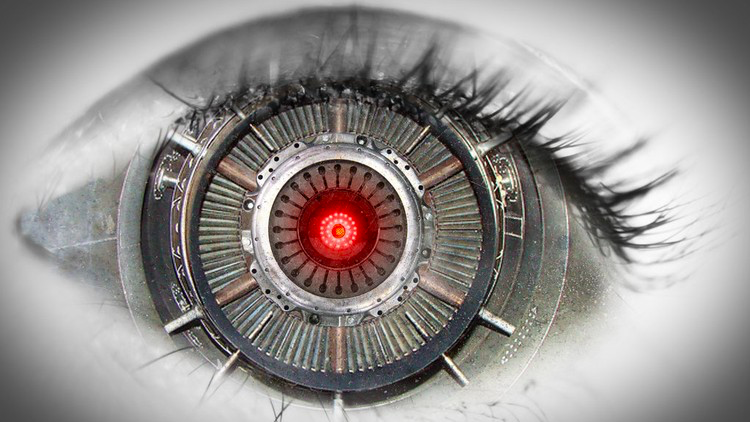

## I have learned to identify nature's and man's beautiful creations like forests, seas, buildings, mountains,glaciers and streets.

## JUST ENTER THE IMAGE PATH AND I WILL TELL YOU WHAT IS THERE IN YOUR IMAGE




ENTER IMAGE PATH:download (7).jpeg


🤔🤔🤔🤔🤔🤔🤔🤔


Text(0.5, 0, 'SEA')

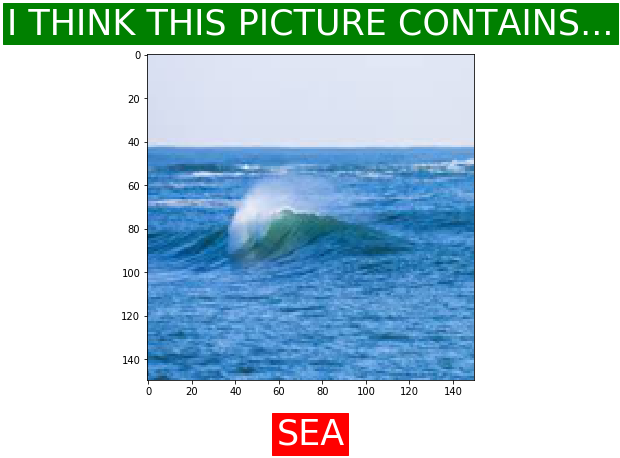

In [92]:
print()
print()
print()
img_path=input("ENTER IMAGE PATH:")
img=load_img(img_path)
newsize = (150,150)
img = img.resize(newsize)
x = np.expand_dims(img, axis = 0)
x = x / 255
category1 = model_xception.predict(x)
category1 = np.argmax(category1, axis=1)
category1 = labels[int(category1)]
fig=plt.figure(figsize=(10,6))
plt.imshow(img)
print()
print()
print("\N{thinking face}"*8)
plt.title("I THINK THIS PICTURE CONTAINS...", fontsize=35, loc="center",backgroundcolor='green',color='white',pad=20)
plt.xlabel(category1.upper(), fontsize=35, labelpad=20, backgroundcolor='red',color='white')




ENTER IMAGE PATH:build_new_york.jpeg


🤔🤔🤔🤔🤔🤔🤔🤔


Text(0.5, 0, 'BUILDINGS')

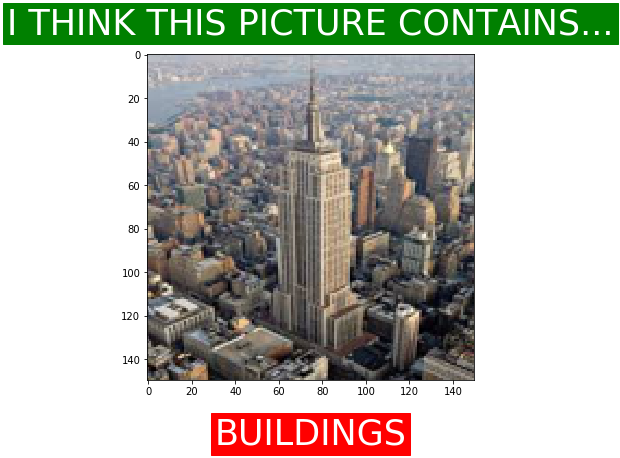

In [93]:
print()
print()
print()
img_path=input("ENTER IMAGE PATH:")
img=load_img(img_path)
newsize = (150,150)
img = img.resize(newsize)
x = np.expand_dims(img, axis = 0)
x = x / 255
category1 = model_xception.predict(x)
category1 = np.argmax(category1, axis=1)
category1 = labels[int(category1)]
fig=plt.figure(figsize=(10,6))
plt.imshow(img)
print()
print()
print("\N{thinking face}"*8)
plt.title("I THINK THIS PICTURE CONTAINS...", fontsize=35, loc="center",backgroundcolor='green',color='white',pad=20)
plt.xlabel(category1.upper(), fontsize=35, labelpad=20, backgroundcolor='red',color='white')




ENTER IMAGE PATH:adventure-awesome-boardwalk-726298.jpg


🤔🤔🤔🤔🤔🤔🤔🤔


Text(0.5, 0, 'FOREST')

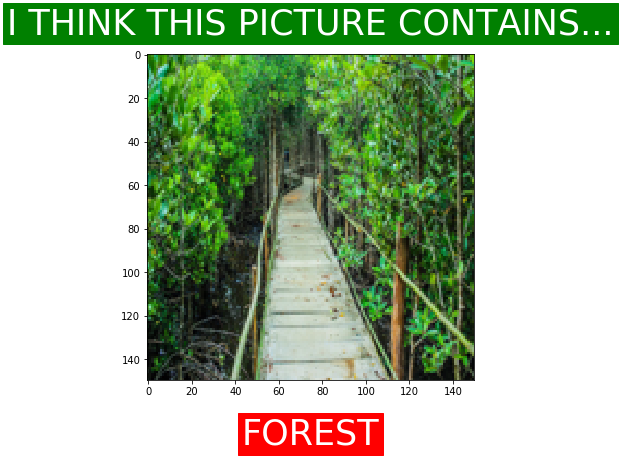

In [94]:
print()
print()
print()
img_path=input("ENTER IMAGE PATH:")
img=load_img(img_path)
newsize = (150,150)
img = img.resize(newsize)
x = np.expand_dims(img, axis = 0)
x = x / 255
category1 = model_xception.predict(x)
category1 = np.argmax(category1, axis=1)
category1 = labels[int(category1)]
fig=plt.figure(figsize=(10,6))
plt.imshow(img)
print()
print()
print("\N{thinking face}"*8)
plt.title("I THINK THIS PICTURE CONTAINS...", fontsize=35, loc="center",backgroundcolor='green',color='white',pad=20)
plt.xlabel(category1.upper(), fontsize=35, labelpad=20, backgroundcolor='red',color='white')




ENTER IMAGE PATH:glacier1.jpeg


🤔🤔🤔🤔🤔🤔🤔🤔


Text(0.5, 0, 'GLACIER')

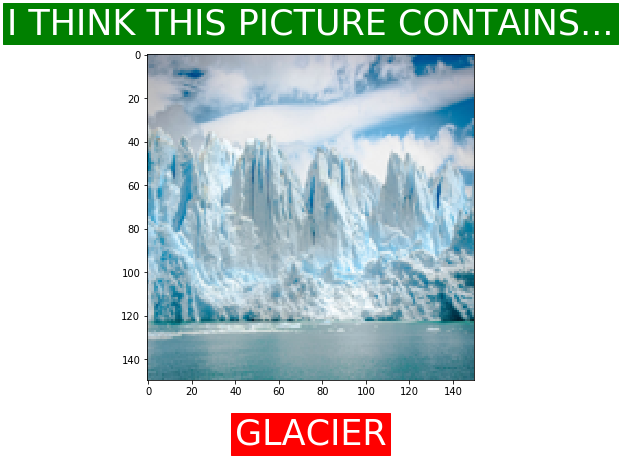

In [95]:
print()
print()
print()
img_path=input("ENTER IMAGE PATH:")
img=load_img(img_path)
newsize = (150,150)
img = img.resize(newsize)
x = np.expand_dims(img, axis = 0)
x = x / 255
category1 = model_xception.predict(x)
category1 = np.argmax(category1, axis=1)
category1 = labels[int(category1)]
#plt.imshow(img)
fig=plt.figure(figsize=(10,6))
plt.imshow(img)
print()
print()
print("\N{thinking face}"*8)
plt.title("I THINK THIS PICTURE CONTAINS...", fontsize=35, loc="center",backgroundcolor='green',color='white',pad=20)
plt.xlabel(category1.upper(), fontsize=35, labelpad=20, backgroundcolor='red',color='white')




ENTER IMAGE PATH:kolkata-park-street-148387245191-orijgp.jpg


🤔🤔🤔🤔🤔🤔🤔🤔


Text(0.5, 0, 'STREET')

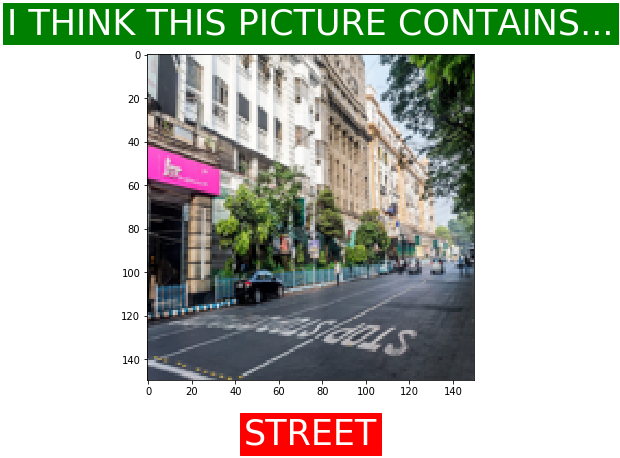

In [96]:
print()
print()
print()
img_path=input("ENTER IMAGE PATH:")
img=load_img(img_path)
newsize = (150,150)
img = img.resize(newsize)
x = np.expand_dims(img, axis = 0)
x = x / 255
category1 = model_xception.predict(x)
category1 = np.argmax(category1, axis=1)
category1 = labels[int(category1)]
fig=plt.figure(figsize=(10,6))
plt.imshow(img)
print()
print()
print("\N{thinking face}"*8)
plt.title("I THINK THIS PICTURE CONTAINS...", fontsize=35, loc="center",backgroundcolor='green',color='white',pad=20)
plt.xlabel(category1.upper(), fontsize=35, labelpad=20, backgroundcolor='red',color='white')




ENTER IMAGE PATH:download (8).jpeg


🤔🤔🤔🤔🤔🤔🤔🤔


Text(0.5, 0, 'MOUNTAIN')

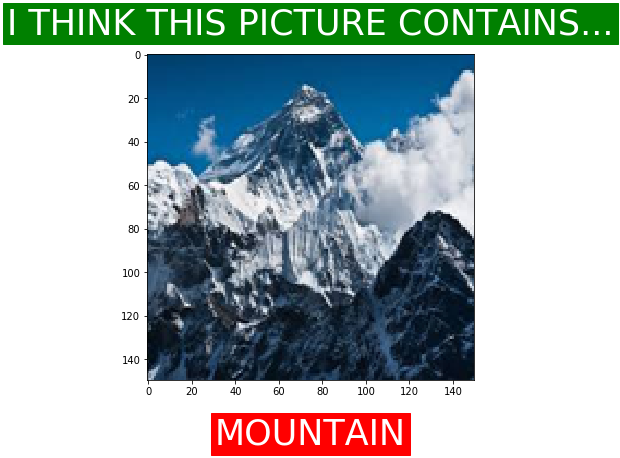

In [97]:
print()
print()
print()
img_path=input("ENTER IMAGE PATH:")
img=load_img(img_path)
newsize = (150,150)
img = img.resize(newsize)
x = np.expand_dims(img, axis = 0)
x = x / 255
category1 = model_xception.predict(x)
category1 = np.argmax(category1, axis=1)
category1 = labels[int(category1)]
fig=plt.figure(figsize=(10,6))
plt.imshow(img)
print()
print()
print("\N{thinking face}"*8)
plt.title("I THINK THIS PICTURE CONTAINS...", fontsize=35, loc="center",backgroundcolor='green',color='white',pad=20)
plt.xlabel(category1.upper(), fontsize=35, labelpad=20, backgroundcolor='red',color='white')